# 1-2. 単回帰分析をしてみよう！

In [19]:
%matplotlib inline
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# 予測データ（y_pred）をダミーで作成（seedを設定しないと、毎回違う結果になる）
np.random.seed(0)

# ボストン市の住宅価格データ一式
boston = load_boston()  

# 予測の元になる多次元のデータ
X = pd.DataFrame(boston.data, columns=boston.feature_names)

# 予測の対象になる1次元のデータ
y = pd.Series(boston.target, name='MEDV')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
def scatter(y_pred, y):
    plt.gca().set_aspect('equal', adjustable='box')  # 縦横比を1
    plt.ylabel('y_test(true)')
    plt.xlabel('y_pred')
    plt.plot([y.min(), y.max()], [y.min(), y.max()])  # 斜め45度の青い線
    plt.plot(y_pred, y, '.') 

In [13]:
from sklearn.linear_model import LinearRegression
# 出力時に小数点以下3桁に
%precision 3

'%.3f'

In [20]:
# 線形回帰の作成
lr = LinearRegression()
# フィッティング
lr.fit(X_train[['RM']], y_train)
# パラメータ（定数項と係数）の確認
lr.intercept_, lr.coef_

(-36.181, array([9.313]))

In [21]:
# 予測値
y_pred = lr.predict(X_test[['RM']])

#決定係数
score1 = r2_score(y_test, y_pred)
score1

0.468

In [22]:
# 平均二乗誤差
score2 = mean_squared_error(y_test, y_pred)
score2

43.472

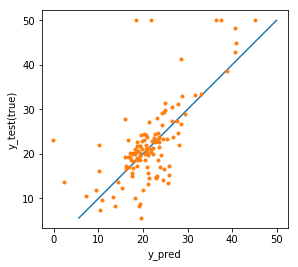

In [26]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

# 予測データ（y_pred）と真値（y_test）を描画
scatter(y_pred, y_test)

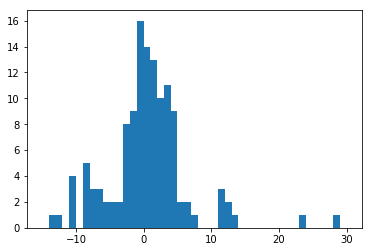

In [27]:
plt.hist(y_test - y_pred, range=(-15, 30), bins = 45);